# Early Detection of Chronic Kidney Disease Using Machine Learning Techniques

## Exploratory Data Analysis (EDA)

In [1]:
# importing all the necessary libraries and classes
import pandas as ckd_pd
import numpy as np
import matplotlib.pyplot as CKD_plot
import seaborn as CKD_seaborn
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [2]:
# loading ckd cleaned dataset

ckd_DataFrame= ckd_pd.read_csv('CKD_cleaned.csv')
ckd_DataFrame.head(10)


,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCells,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


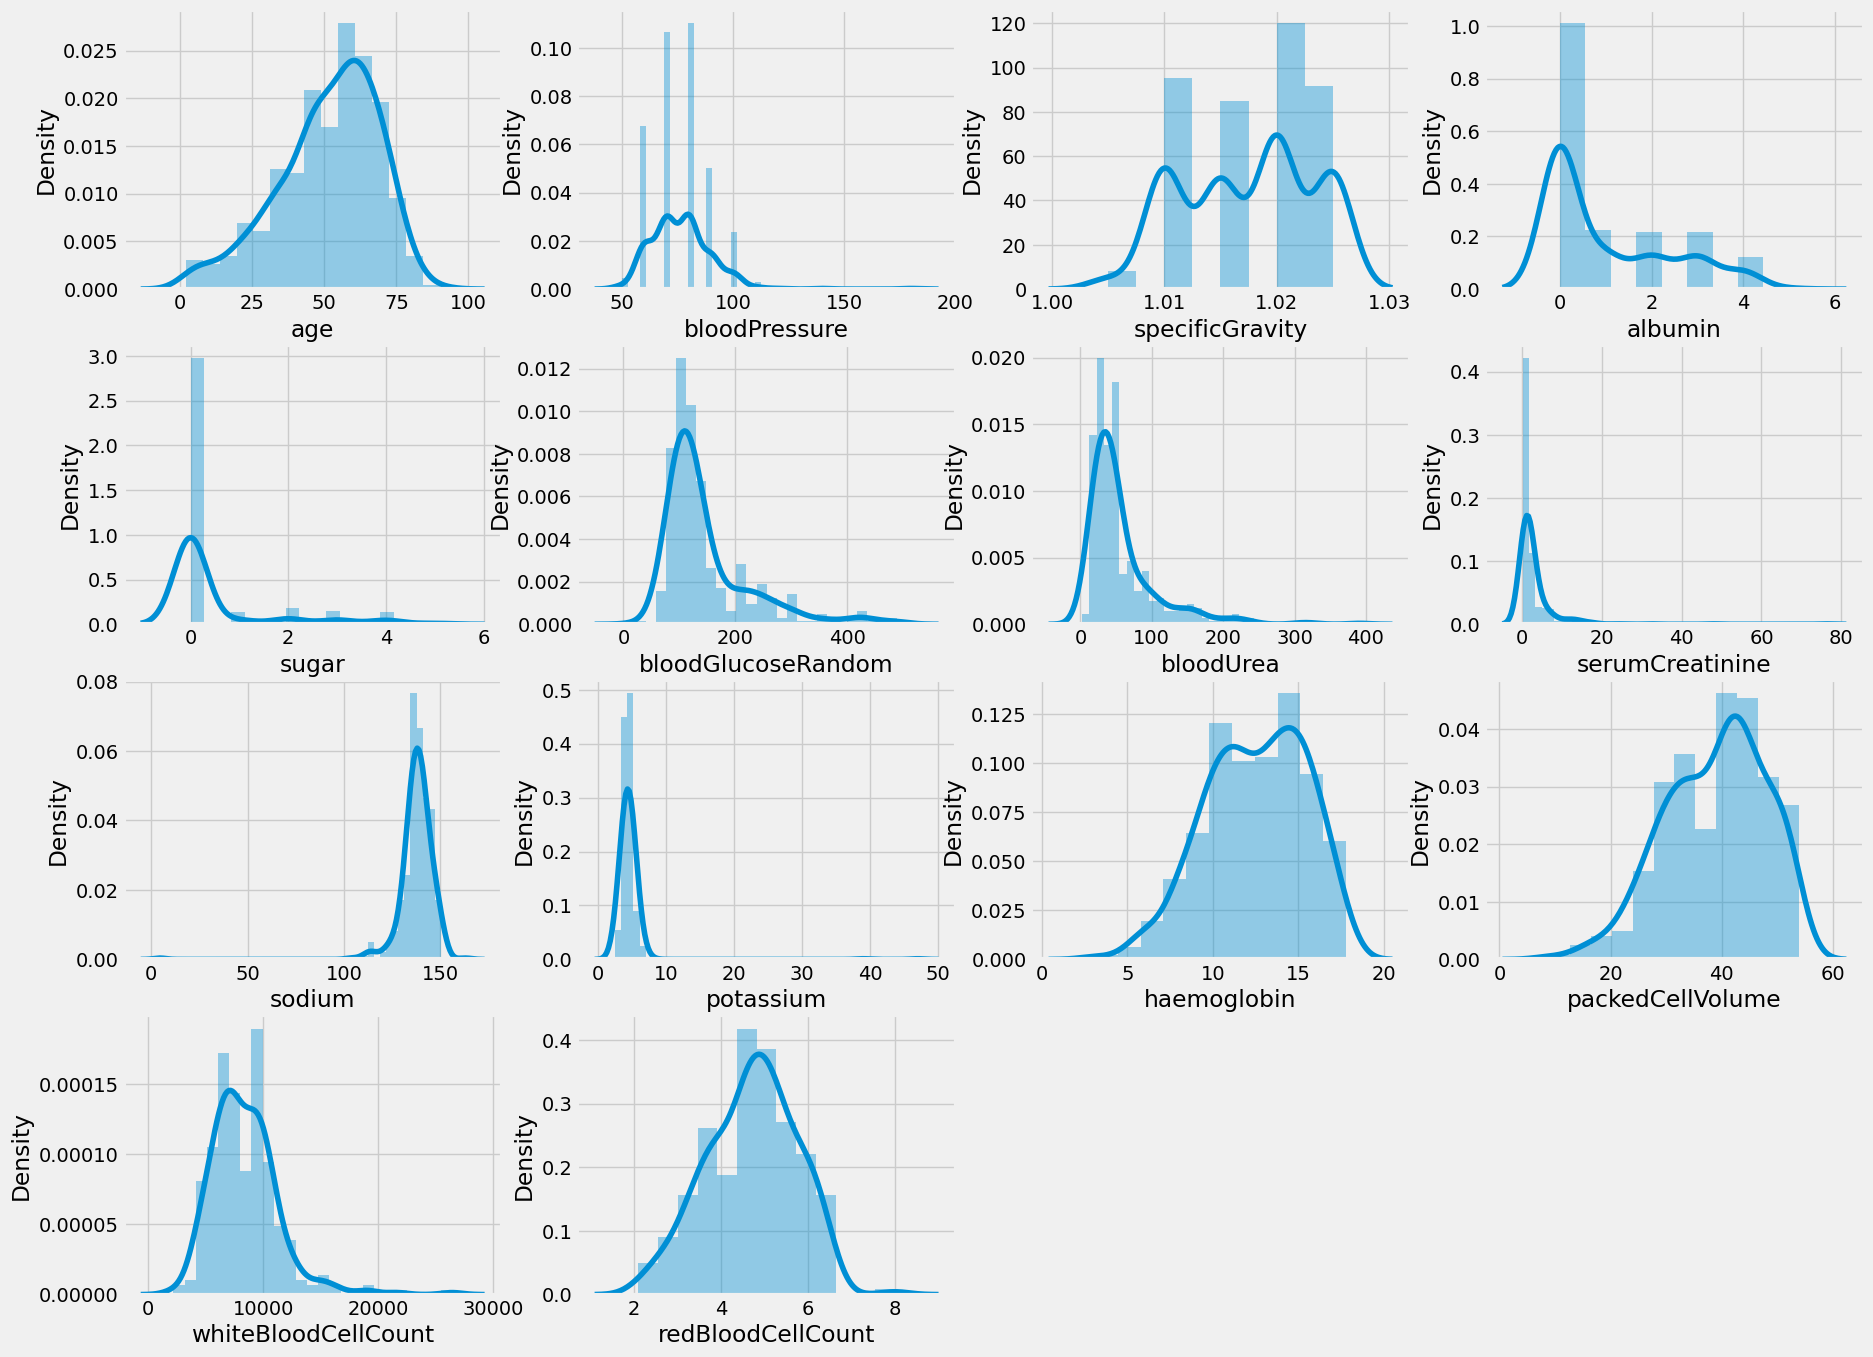

In [10]:
#numerical feature distribution
numerical_columns = [featuredColumn for featuredColumn in ckd_DataFrame.columns if ckd_DataFrame[featuredColumn].dtype != 'object']
ckd_pd.set_option('display.max_columns', 26)
CKD_plot.style.use('fivethirtyeight')

CKD_plot.figure(figsize = (20, 20))
plotCount = 1

for featuredColumn in numerical_columns:
    if plotCount <= len(numerical_columns):
        plot_axis = CKD_plot.subplot(5, 4,plotCount)
        CKD_seaborn.distplot(ckd_DataFrame[featuredColumn])
        CKD_plot.xlabel(featuredColumn)
    plotCount+=1


CKD_plot.show()

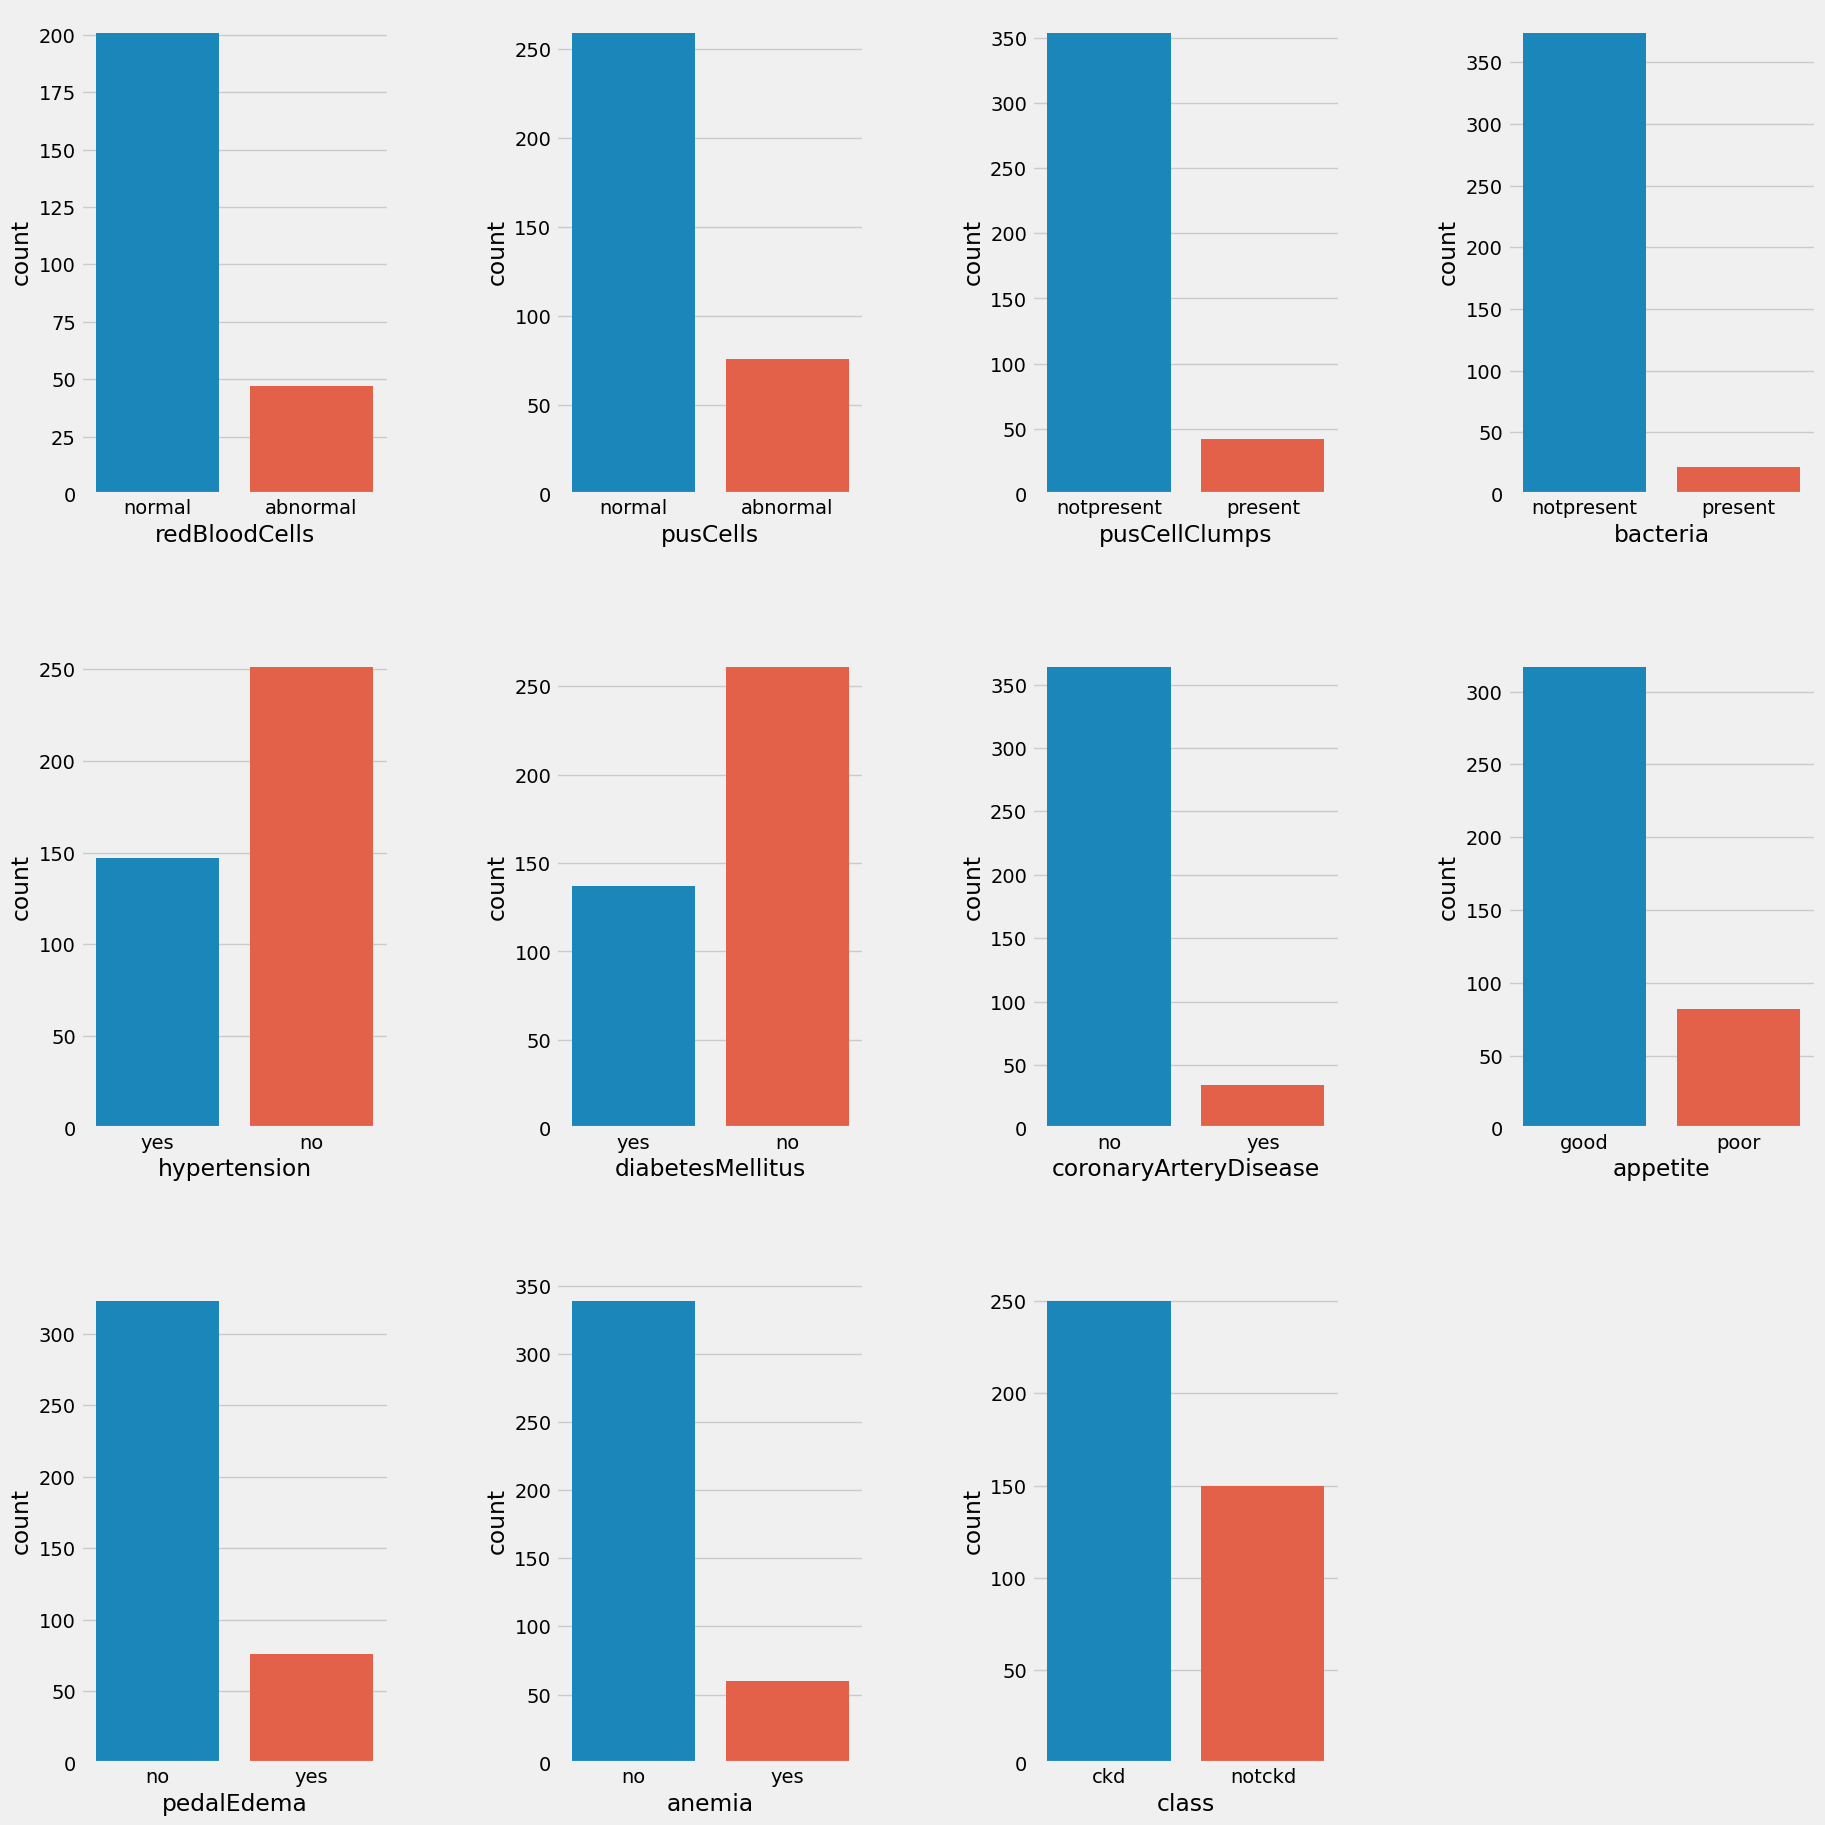

In [4]:
 #categorical columns label distribution
categorical_columns = [featuredColumn for featuredColumn in ckd_DataFrame.columns if ckd_DataFrame[featuredColumn].dtype == 'object']

CKD_plot.figure(figsize = (20, 20))
plotCount = 1


for featuredColumn in categorical_columns:
    if plotCount <= len(categorical_columns):
        plot_axis = CKD_plot.subplot(3, 4, plotCount)
        CKD_seaborn.countplot(data=ckd_DataFrame, x=featuredColumn)
        CKD_plot.xlabel(featuredColumn)

    plotCount += 1

CKD_plot.tight_layout(pad = 5)
CKD_plot.show()

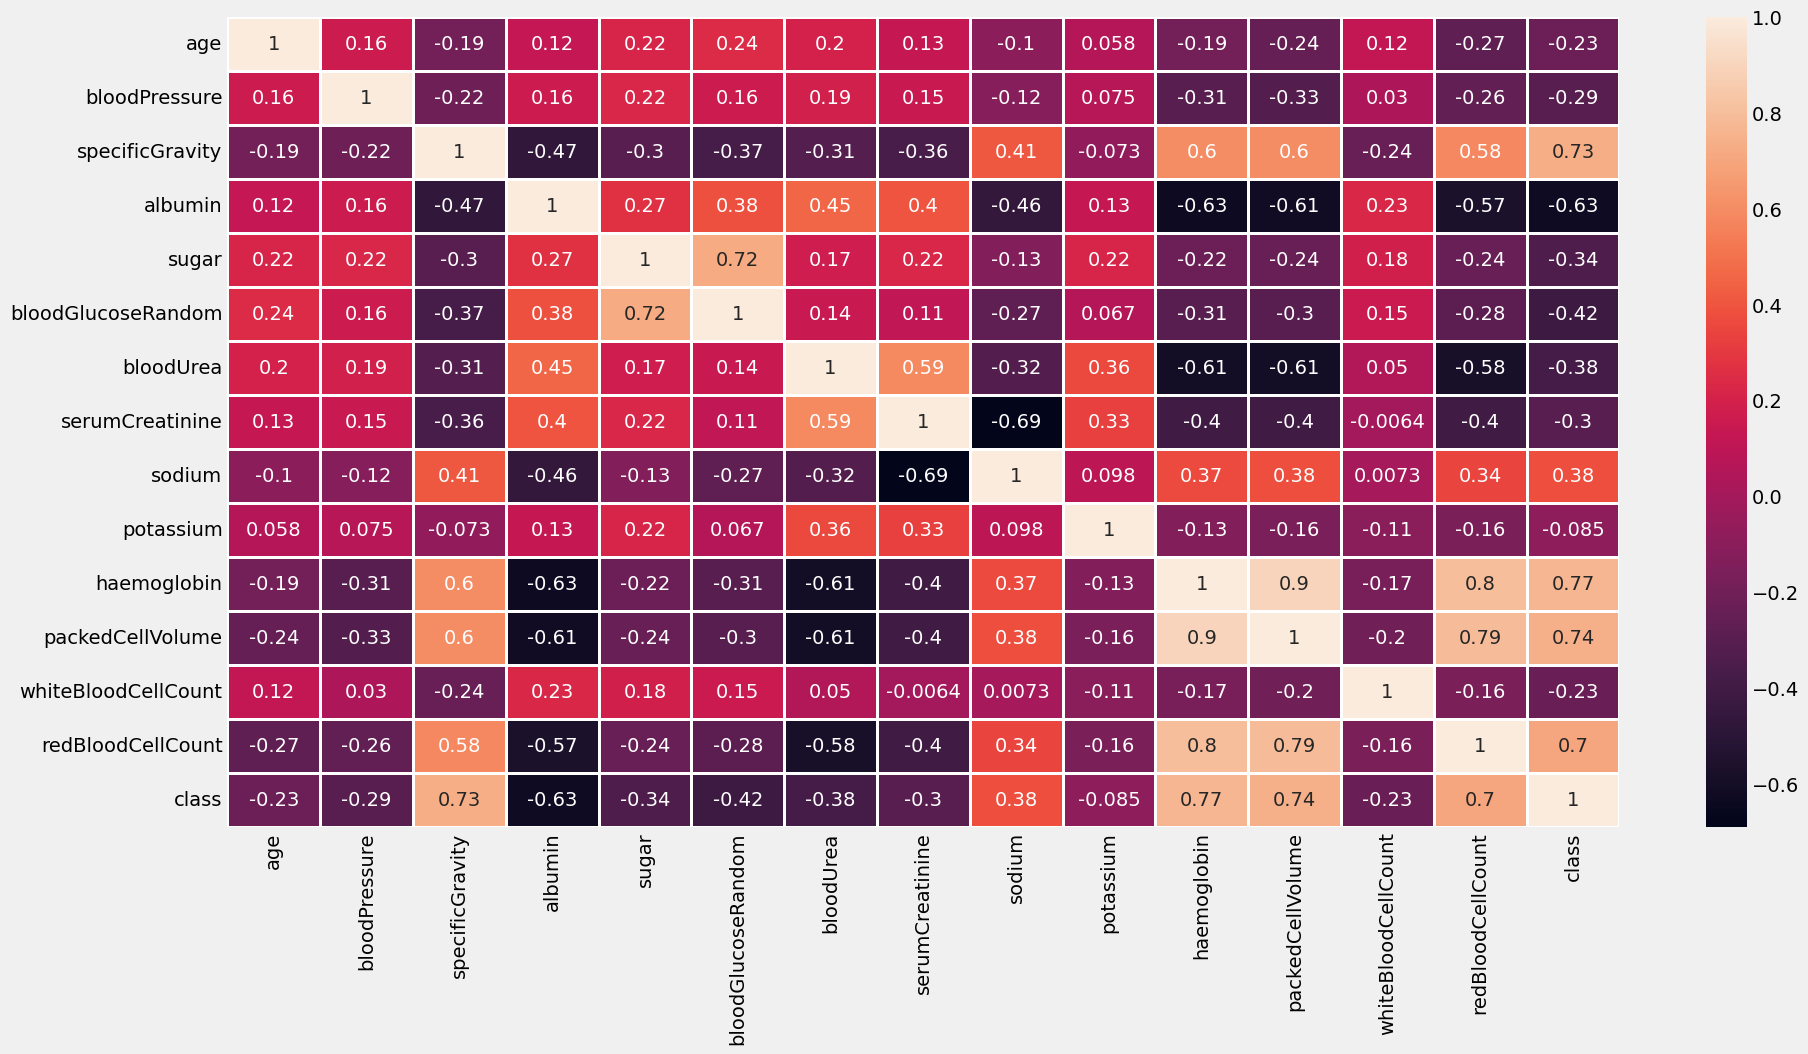

In [5]:
# finding correaltions from heatmap of data before data preprocessing

corr_ckd_DataFrame = ckd_DataFrame.copy()
corr_ckd_DataFrame['class'] = corr_ckd_DataFrame['class'].map({'ckd': 0, 'notckd': 1})
corr_ckd_DataFrame['class'] = ckd_pd.to_numeric(corr_ckd_DataFrame['class'], errors='coerce')

CKD_plot.figure(figsize = (20, 10))

CKD_seaborn.heatmap(corr_ckd_DataFrame.corr(),annot = True, linewidths = 2)
CKD_plot.show()
